# A Data Science Project in Python

We are ready to start a data science project. Today we'll talk about investments!

## Overview

### Project Objective

We want to construct a small growth portfolio and evaluate its performance for the period between July 1st 2020 and June 30th 2021.

### Execution Plan (divide and conquer)

- Get (and understand) the data
- Exploratory Analysis (understand the data)
- Data cleaning
- Signal generation
- Portfolio performance

## Get the data

First we need the data. We will use Yahoo Finance for data prices to calculate returns. A extra table with information on assets market capitalization and book equity has been provided in "data/data_mc_be.csv" (you could get this data yourself from plataforms like Bloomberg, Facset or Compustat) 

The Yahoo Finance data has been pre-processed for you and it is saved in ``~/python_boot_capm/DataScienceProject_SI/data/imdb_processed.csv``

If you are curious how we got the data and pre-processed it, here are the steps to follow.

## The Project!

![AQR](images/aqr.png)

### Load the Packages

In [3]:
import numpy as np
import pandas as pd

# for importing yahoo finance data
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regressions
import statsmodels.api as sm
import statsmodels.formula.api as smf

# to make your plots appear in your notebook
%matplotlib inline

### Load the Data

In [54]:
fdata = pd.read_csv("data/data_mc_be.csv")

In [108]:
# Download the data from Yahoo Finance
ticker_list = fdata.ticker

start_date= "2020-07-01"
end_date="2021-08-20"

def getData(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    dataname= ticker
    SaveData(data, dataname)

# Create a data folder in your current dir.
def SaveData(df, filename):
    df.to_csv('data/yahoo/'+filename+'.csv')
    
#This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

AGTI
[*********************100%***********************]  1 of 1 completed
AMC
[*********************100%***********************]  1 of 1 completed
AVTR
[*********************100%***********************]  1 of 1 completed
AZPN
[*********************100%***********************]  1 of 1 completed
BIO
[*********************100%***********************]  1 of 1 completed
BYND
[*********************100%***********************]  1 of 1 completed
CEVA
[*********************100%***********************]  1 of 1 completed
DDS
[*********************100%***********************]  1 of 1 completed
GBIO
[*********************100%***********************]  1 of 1 completed
GME
[*********************100%***********************]  1 of 1 completed
IEX
[*********************100%***********************]  1 of 1 completed
IRTC
[*********************100%***********************]  1 of 1 completed
LOPE 
[*********************100%***********************]  1 of 1 completed
MDB
[*********************100%************

In [109]:
# Create one data frame with all the data from YF
pdata = pd.DataFrame()
for tik in ticker_list:
    tik_data = pd.read_csv('data/yahoo/'+tik+'.csv')
    tik_data['ticker'] = tik
    pdata = pdata.append(tik_data)

In [110]:
# Format column names
pdata.columns = pdata.columns.str.lower()
pdata.columns = [c.replace(' ', '_') for c in pdata.columns]
pdata

date        open        high         low       close   adj_close  \
0    2021-04-23   16.049999   16.490000   15.120000   16.400000   16.400000   
1    2021-04-26   16.330000   17.080000   15.270000   15.800000   15.800000   
2    2021-04-27   15.750000   15.890000   15.570000   15.800000   15.800000   
3    2021-04-28   15.700000   16.120001   15.360000   15.720000   15.720000   
4    2021-04-29   15.730000   16.075001   15.545000   15.860000   15.860000   
..          ...         ...         ...         ...         ...         ...   
282  2021-08-13  163.639999  165.369995  158.509995  159.309998  159.309998   
283  2021-08-16  158.369995  165.000000  157.380005  164.389999  164.389999   
284  2021-08-17  162.119995  163.660004  156.750000  161.130005  161.130005   
285  2021-08-18  161.000000  165.820007  160.300003  162.809998  162.809998   
286  2021-08-19  160.000000  163.080002  157.570007  158.649994  158.649994   

      volume ticker  
0    8878900   AGTI  
1    1886900   AGTI  
2     921800   AGTI  
3     341700   AGTI  
4    2309600   AGTI  
..       ...    ...  
282  1304700    WSM  
283   759700    WSM  
284  1104800    WSM  
285  1182500    WSM  
286   677100    WSM  

[6110 rows x 8 columns]

## Look at the Data

1. Look at data using .head()
2. Look at the column names
3. Look for variable types, nas, etc.
4. Maybe some value counts?

In [55]:
fdata.head(2)

ticker ticker_blb  market_cap  book_equity
0    AAL        AAL  50919.9912        -0.28
1   AGTI       AGTI   1224.0494       462.00

In [48]:
pdata.head(2)

date   open   high    low  close  adj_close     volume ticker
0  2020-07-01  13.48  14.29  12.63  12.81      12.81  116661700    AAL
1  2020-07-02  13.35  13.42  12.42  12.50      12.50   86439500    AAL

In [ ]:
fdata.dtypes

In [51]:
pdata.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
ticker        object
dtype: object

In [52]:
pdata.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'ticker'],
      dtype='object')

In [56]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6971 entries, 0 to 286
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6971 non-null   object 
 1   open       6971 non-null   float64
 2   high       6971 non-null   float64
 3   low        6971 non-null   float64
 4   close      6971 non-null   float64
 5   adj_close  6971 non-null   float64
 6   volume     6971 non-null   int64  
 7   ticker     6971 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 490.1+ KB


In [58]:
pdata.ticker.value_counts()

AAL      287
IRTC     287
TXG      287
TNC      287
SM       287
SIG      287
RGNX     287
RCKT     287
PNR      287
NKLA     287
MDB      287
LOPE     287
IEX      287
GME      287
GBIO     287
DDS      287
CEVA     287
BYND     287
BIO      287
AZPN     287
AVTR     287
APO      287
AMC      287
WSM      287
AGTI      83
Name: ticker, dtype: int64

In [59]:
fdata.describe()

market_cap   book_equity
count     25.000000     24.000000
mean    8191.447708   1884.030000
std    10747.423325   2803.621168
min        0.000000     -0.280000
25%     1224.049400    386.750000
50%     4284.230300    752.500000
75%    11535.944800   2027.000000
max    50919.991200  11690.000000

## Let's create our signal: BEME

In [60]:
fdata.columns

Index(['ticker', 'ticker_blb', 'market_cap', 'book_equity'], dtype='object')

In [61]:
fdata['beme'] = fdata['book_equity']/fdata['market_cap']

In [80]:
fdata.beme.describe()

count    22.000000
mean      0.532123
std       0.979197
min       0.012483
25%       0.080290
50%       0.301307
75%       0.525687
max       4.727456
Name: beme, dtype: float64

In [71]:
fdata.loc[(fdata.book_equity<0)|(fdata.market_cap<=0),'beme'] = np.nan

In [75]:
fdata.dropna(inplace = True)

Can you plot the distribution of BEME?

In [95]:
fdata.beme.hist()

<AxesSubplot:>

### Let's sort our stocks into two groups: value and growth

In [89]:
fdata['beme_signal'] = pd.qcut(fdata.beme, q = [0, .5, 1], labels = ['growth', 'value'])

In [93]:
fdata.beme_signal.value_counts()

growth    11
value     11
Name: beme_signal, dtype: int64

In [90]:
fdata.groupby('beme_signal').beme.mean()

beme_signal
growth    0.113244
value     0.951003
Name: beme, dtype: float64

In [92]:
fdata[fdata.beme_signal=='value']

ticker ticker_blb  market_cap  book_equity      beme signal beme_signal
1    AGTI       AGTI   1224.0494        462.0  0.377436  value       value
2     AMC        AMC  11696.8301      11690.0  0.999416  value       value
6     BIO        BIO  14558.2161       7353.0  0.505076  value       value
8    CEVA       CEVA    688.3701        252.0  0.366082  value       value
9     DDS        DDS   1419.1564       6709.0  4.727456  value       value
10   GBIO       GBIO   1087.2077        579.0  0.532557  value       value
11    GME        GME   1026.6537        951.0  0.926310  value       value
14  LOPE       LOPE    4284.2303       1489.0  0.347554  value       value
19   RGNX       RGNX   1047.0374        397.0  0.379165  value       value
20    SIG        SIG   4115.6210       2338.0  0.568080  value       value
21     SM         SM   3115.1906       2280.0  0.731897  value       value

## Let's now work on our prices data set

We have prices, but we need returns. How do it? $$r_{i,t} = \frac{p_{i,t} + d_{i, t} - p_{i,t-1}}{p_{i,t-1}}$$ 

In [100]:
pdata.sort_values(['ticker','date'], inplace=True)

In [104]:
pdata.set_index(['ticker','date'],inplace=True)

In [113]:
pdata['lag_adj_close'] = pdata.groupby('ticker').adj_close.shift()

In [114]:
pdata['ret'] = (pdata['adj_close'] - pdata['lag_adj_close'])/pdata['lag_adj_close']

How to check if it worked?

#### We can easily add some other statistics

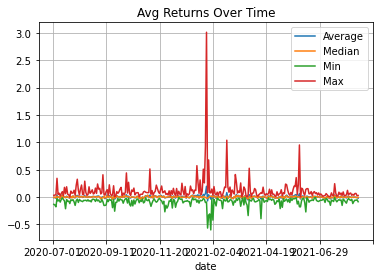

In [116]:
pdata.groupby('date').ret.mean().plot(grid=True, title='Avg Returns Over Time')
plt.plot(pdata.groupby('date').ret.median())
plt.plot(pdata.groupby('date').ret.min())
plt.plot(pdata.groupby('date').ret.max())
plt.legend(['Average', 'Median', 'Min', 'Max'])

<AxesSubplot:title={'center':'Avg Returns Over Time'}, xlabel='date'>

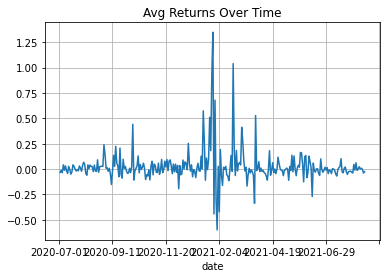

In [119]:
pdata[pdata.ticker == 'GME'].set_index('date').ret.plot(grid=True, title='Avg Returns Over Time')

What would be more informative than raw returns?

## Exercise
1. Can you calculate and plot the cumulative returns of GME?
2. Can you calculate the cumulative of all stocks in the sample and flag the highest and lowest returns of the period?

## Let's create our long-short portfolio

We first need to merge the pdata with fdata

In [122]:
mdata = pd.merge(pdata, fdata, on = ['ticker'])

Is beme related to reurns at all?

## How to Understand What Determines Returns?

The is a package called seaborn that is great to explore the statistical relationship between variables in you data set. We are going to explore some functionalities of seaborn.

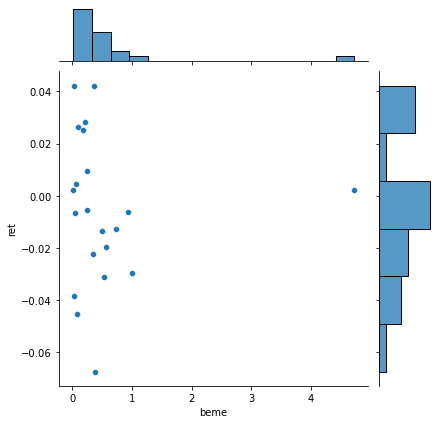

In [129]:
sns.jointplot(y='ret', x='beme', data=mdata[mdata.date=='2021-01-20'])

Should we look only at one year?

In [123]:
mdata['log_ret'] = np.log(1+mdata['ret'])

In [125]:
mdata['cumret'] = mdata.groupby('ticker').ret.cumsum()

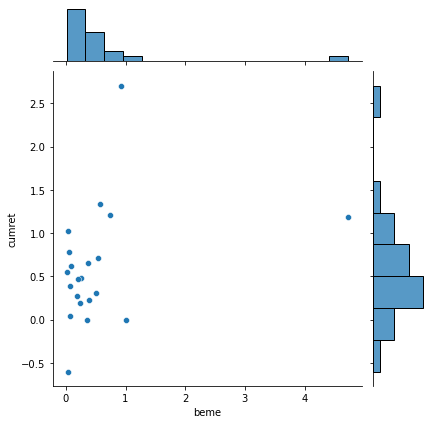

In [130]:
sns.jointplot(y='cumret', x='beme', data=mdata[mdata.date=='2021-01-20'])

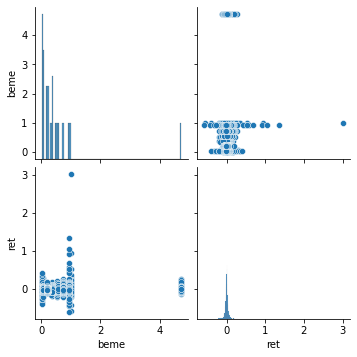

In [133]:
sns.pairplot(mdata[['beme', 'ret']])

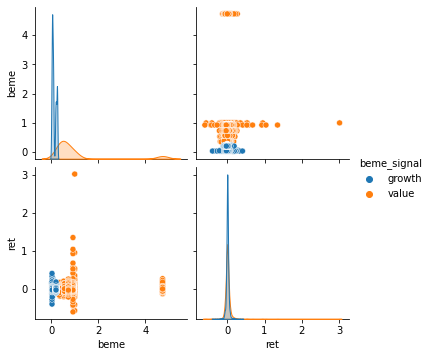

In [138]:
sns.pairplot(mdata[['beme', 'ret', 'beme_signal']], hue='beme_signal')

Let's create our portfolios

In [140]:
port_ret = mdata.groupby(['date', 'beme_signal']).ret.mean()

Can you reshape this data, as we have vale and growth as columns?

In [144]:
port_ret = port_ret.unstack()

Should we look at it?

<AxesSubplot:xlabel='date'>

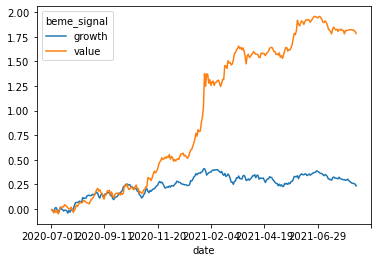

In [149]:
np.log(port_ret + 1).cumsum().plot()

What else should we calculate?

## Data Analyses: What about if we start with a simple OLS?

In [159]:
# for linear regressions
import statsmodels.api as sm
import statsmodels.formula.api as smf

### What is the correlation between Ratings and other variables?

In [151]:
# Run Some Regressions
lm1 = smf.ols('ret ~  np.log(beme)', data=mdata).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           6.50e-05
Time:                        13:51:40   Log-Likelihood:                 7607.0
No. Observations:                6088   AIC:                        -1.521e+04
Df Residuals:                    6086   BIC:                        -1.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0077      0.001      5.824      0.000       0.005       0.010
np.log(beme)     0.0026      0.001      3.997      0.000       0.001       0.004
==============================================================================
Omnibus:                    12361.168   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99822002.685
Skew:                          16.276   Prob(JB):                         0.00
Kurtosis:                     629.464   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
x = lm1.summary()

In [167]:
lm1.params['Intercept']

0.9796318921915681

Is it different for Value and Growth?

In [152]:
lm2 = smf.ols('ret ~  np.log(beme)*beme_signal', data=mdata).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.710
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           0.000162
Time:                        13:52:49   Log-Likelihood:                 7609.1
No. Observations:                6088   AIC:                        -1.521e+04
Df Residuals:                    6084   BIC:                        -1.518e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0028      0.004      0.773      0.440      -0.004       0.010
beme_signal[T.value]                  0.0061      0.004      1.539      0.124      -0.002       0.014
np.log(beme)                          0.0007      0.001      0.546      0.585      -0.002       0.003
np.log(beme):beme_signal[T.value]     0.0045      0.002      2.024      0.043       0.000       0.009
==============================================================================
Omnibus:                    12353.256   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99758429.829
Skew:                          16.250   Prob(JB):                         0.00
Kurtosis:                     629.266   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise
1. Can you check if returns are correlated with market cap?
2. Can you think about other interesting correlations to check?

### How to get standard errors right?

#### Robust SD

1. HC0: White (1980) Robust Standard Errors
2. HC1: Small sample analogues MacKinnon and White (1985)
3. More check here: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_robustcov_results.html

In [153]:
## Get Robust Standard Errors
lm1.get_robustcov_results('HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.78
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           0.000353
Time:                        13:53:24   Log-Likelihood:                 7607.0
No. Observations:                6088   AIC:                        -1.521e+04
Df Residuals:                    6086   BIC:                        -1.520e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0077      0.002      4.273      0.000       0.004       0.011
np.log(beme)     0.0026      0.001      3.575      0.000       0.001       0.004
==============================================================================
Omnibus:                    12361.168   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99822002.685
Skew:                          16.276   Prob(JB):                         0.00
Kurtosis:                     629.464   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""